# COVID-19 prediction: Interpretable Trees

## Import data and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlrd
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import os
from julia import Julia
os.environ['IAI_DISABLE_COMPILED_MODULES'] = 'True'
jpath = "/Users/alexandreberkovic/.julia/juliaup/julia-1.8.2+0.x64/bin/julia" # path to Julia, from current directory (your path may be slightly different)
sysimg = '/Users/alexandreberkovic/.julia/juliaup/julia-1.8.2+0.x64/lib/julia/sys.dylib'
jl = Julia(runtime=jpath, sysimage = sysimg, compiled_modules=False) # compiled_modules=True may work for you; it didn't for me
jl

In [4]:
df = pd.read_csv('Data_cleaned/covid_clean_imputted_aggregated.csv')
df_std = pd.read_csv('Data_cleaned/covid_clean_imputted_std_aggregated.csv')

### Optimal Regression Trees

In [10]:
# replace the row number with the date
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# replace the row number with the date
df_std['date'] = pd.to_datetime(df_std['date'])
df_std = df_std.set_index('date')

In [11]:
#  sort the index by date in ascending order and then by country in descending order 
df = df.sort_index(ascending=True, axis=0)

#  sort the index by date in ascending order and then by country in descending order 
df_std = df_std.sort_index(ascending=True, axis=0)

Text(0.5, 1.0, 'Deaths due to COVID-19')

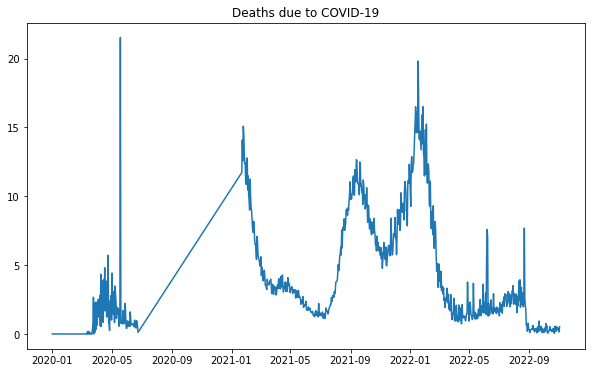

In [12]:
# plot df['deaths_covid']
plt.figure(figsize=(10, 6))
plt.plot(df['deaths_covid'])
plt.title('Deaths due to COVID-19')